# Data Transforms

### 1. Obtain the MNIST and Galaxy datasets
    
(a) The datasets are available in .npz format on the indico page.

In [2]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sn
import scipy
import random

In [3]:
#Load the MNIST dataset
mnist = np.load('mnist.npz')

#Check which files are inside the archive.
for k in mnist.files:
    print(k)

X
y


In [4]:
#In order to recognize which file correspond to the pixels and which one to the labels, we look at
#the shape of the data

print(np.shape(mnist['X']))
print(np.shape(mnist['y']))

(70000, 784)
(70000,)


In [5]:
images_mnist = mnist['X']
labels_mnist = mnist['y']

In [6]:
#Do the same with the galaxy dataset.
galaxy = np.load('galaxy.npz')
for k in galaxy.files:
    print(k)

X
y


In [7]:
print(np.shape(galaxy['X']))
print(np.shape(galaxy['y']))

(10000, 4096)
(10000,)


In [8]:
images_galaxy = galaxy['X']
labels_galaxy = galaxy['y']

(b) Explore the dataset by plotting some sample images, as we will use this also for future exercises.

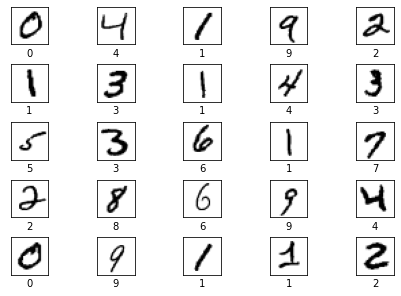

In [9]:
n = 5
fig, ax = plt.subplots(n, n, constrained_layout=True)
image_number = 0
for i in range(n):
    for j in range(n):
        image_number += 1
        ax[i][j].imshow(images_mnist[image_number].reshape(28,28), cmap='binary')
        # hide y-axis 
        ax[i][j].get_yaxis().set_visible(False)
        # remove x-axis ticks
        ax[i][j].xaxis.set_major_locator(ticker.NullLocator())
        # write image label as x axis label
        ax[i][j].set_xlabel(labels_mnist[image_number])

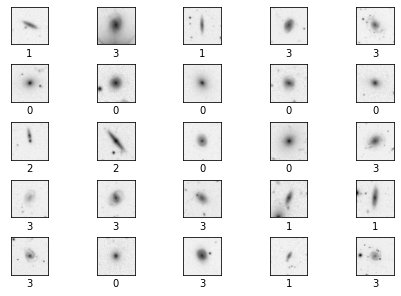

In [10]:
n = 5
fig, ax = plt.subplots(n, n, constrained_layout=True)
image_number = 0
for i in range(n):
    for j in range(n):
        image_number += 1
        ax[i][j].imshow(images_galaxy[image_number].reshape(64,64), cmap='binary', vmin=0, vmax=255)
        # hide y-axis 
        ax[i][j].get_yaxis().set_visible(False)
        # remove x-axis ticks
        ax[i][j].xaxis.set_major_locator(ticker.NullLocator())
        # write image label as x axis label
        ax[i][j].set_xlabel(labels_galaxy[image_number])

### 2. De-correlated and whiten the datasets (interpret each pixel value of the dataset as a dimension)

(a) Assess the covariance / correlation structure of the dataset (Since large matrices are hard to print out, you can try graphical representations, such as color maps).


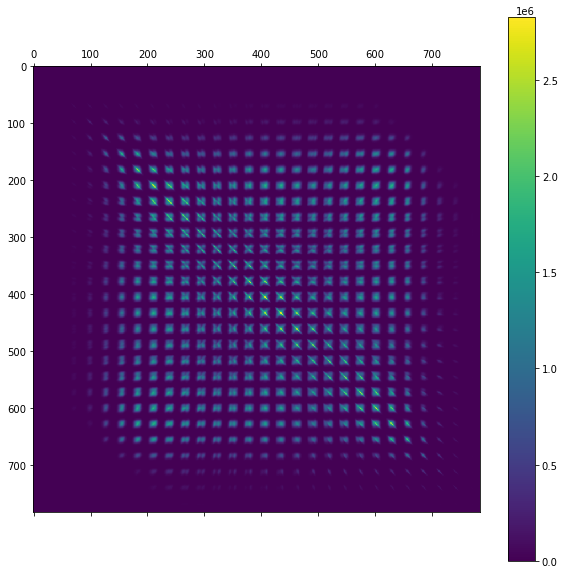

In [16]:
# This is the "raw" covariant matrix of the MNIST data

covMatrix = (images_mnist.T @ images_mnist)/(images_mnist.shape[1] - 1) 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
cax = ax.matshow(covMatrix)
fig.colorbar(cax)

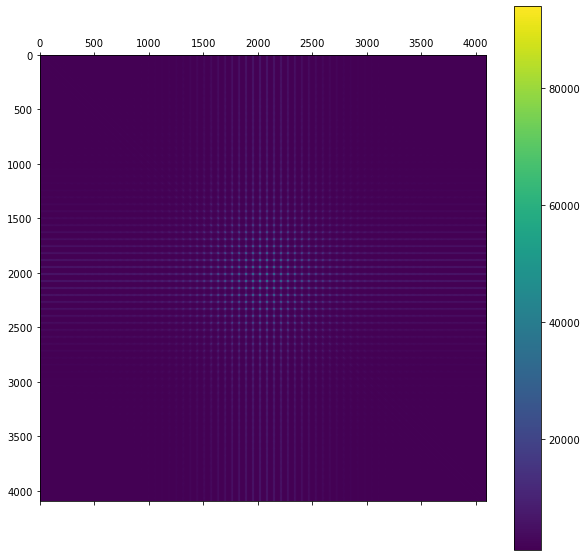

In [132]:
# This is the "raw" covariant matrix of the galaxy data

covMatrix_galaxy = (images_galaxy.T @ images_galaxy)/(images_galaxy.shape[1] - 1) 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
cax = ax.matshow(covMatrix_galaxy)
fig.colorbar(cax)

In [135]:
# Substract the mean from the data.

images_mnist_0 = mnist['X']
for n in range(images_mnist.shape[0]):
    images_mnist_0[n, :] = images_mnist[n, :] - np.mean(images_mnist[n, :])
    
images_galaxy_0 = galaxy['X']
for n in range(images_galaxy.shape[0]):
    images_galaxy_0[n, :] = images_galaxy[n, :] - np.mean(images_galaxy[n, :])
    


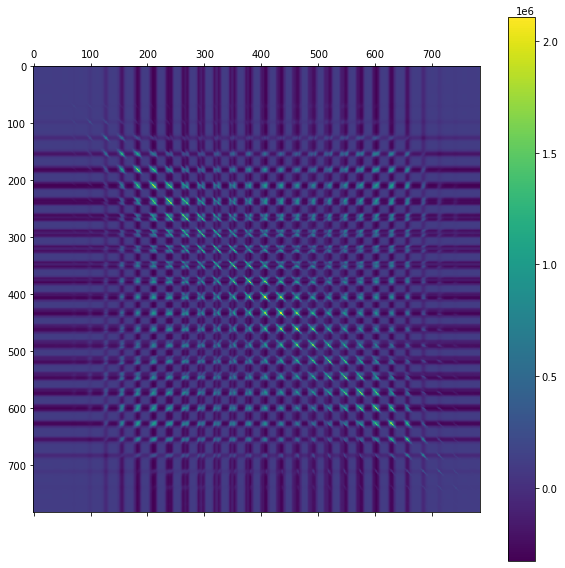

In [133]:
# This is the covariant matrix for the MNIST dataset after having substracted the mean.

covMatrix0 = (images_mnist_0.T @ images_mnist_0)/(images_mnist_0.shape[1] - 1) 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
cax = ax.matshow(covMatrix0)
fig.colorbar(cax)

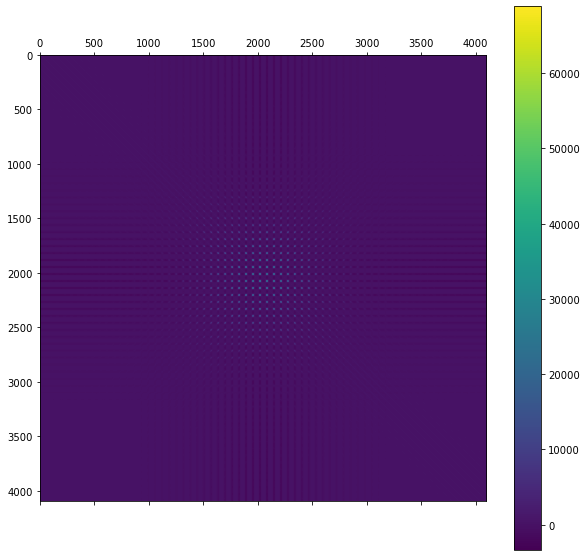

In [136]:
# This is the covariant matrix for the galaxy dataset after having substracted the mean.

covMatrix0_galaxy = (images_galaxy_0.T @ images_galaxy_0)/(images_galaxy_0.shape[1] - 1) 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
cax = ax.matshow(covMatrix0_galaxy)
fig.colorbar(cax)

(b) Use one of the techniques discussed in the lecture (Eigen, Cholesky or SVD).

In [111]:
# We will use the eigenvalues:

L, E = scipy.linalg.eig(covMatrix0)
covMatrix0_diag = E.T @ covMatrix0 @ E
covMatrix0_diag = covMatrix0_diag.real

In [137]:
L_galaxy, E_galaxy = scipy.linalg.eig(covMatrix0_galaxy)
covMatrix0_diag_galaxy = E_galaxy.T @ covMatrix0_galaxy @ E_galaxy
covMatrix0_diag_galaxy = covMatrix0_diag_galaxy.real

(c) Assess the covariance / correlation structure of the now de-correlated dataset.

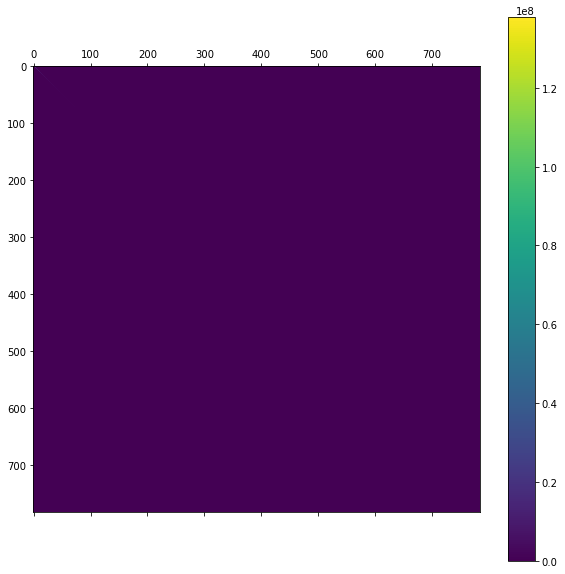

In [112]:
# We now plot the covariant matrix after diagonalization.

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
cax = ax.matshow(covMatrix0_diag)
fig.colorbar(cax)

In [153]:
# As can convience ourselves that this is indeed diagonal by plotting some sample points.

for i in range(5):
    print(covMatrix0_diag[i, i])
    print(covMatrix0_diag[i, i + random.randint(- i, 734 - i)])

137918063.51022193
2.5902409106492996e-09
24644126.49291049
-1.4006218407303095e-09
21904821.06092795
3.8698999560438097e-10
18757128.021204762
1.5086243365658447e-10
16177215.692670707
2.841204604919767e-09


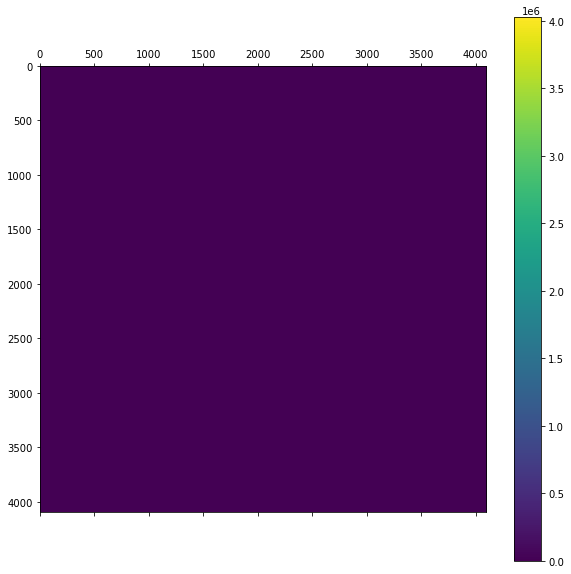

In [151]:
# We now plot the covariant matrix after diagonalization.

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
cax = ax.matshow(covMatrix0_diag_galaxy)
fig.colorbar(cax)

In [144]:
# We now finiish our "whitening" by scaling the diagonal elements of our covariant matrix.

s = 1/L.real
covMatrix_white = np.zeros((700, 700))
for n in range(700):
    covMatrix_white[n, n] = covMatrix0_diag[n, n]*s[n]
    
s_galaxy = 1/L_galaxy.real
covMatrix_white_galaxy = np.zeros((len(s_galaxy), len(s_galaxy)))
for n in range(len(s_galaxy)):
    covMatrix_white_galaxy[n, n] = covMatrix0_diag_galaxy[n, n]*s_galaxy[n]  


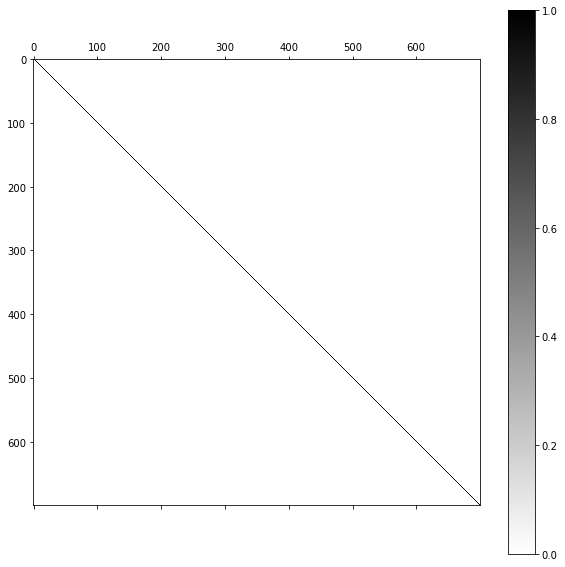

In [145]:
# We now plot our covariant matrix, which should be equal to the identity (up to numerical precision)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
cax = ax.matshow(covMatrix_white, cmap='binary')
fig.colorbar(cax)

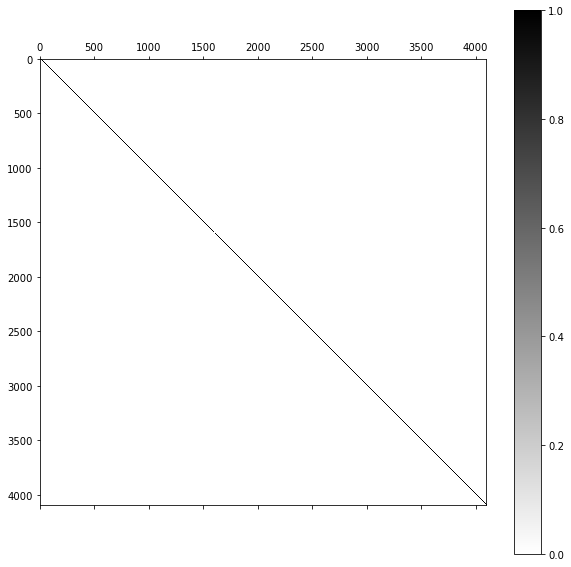

In [147]:
# We now plot our covariant matrix, which should be equal to the identity (up to numerical deviations)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
cax = ax.matshow(covMatrix_white_galaxy, cmap='binary', vmin=0)
fig.colorbar(cax)